In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../../../')
from gp2 import Runner

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
!locate gp2


/lib/modules/5.4.0-104-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-104-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data3/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/6gp2.cif
/usr/src/linux-headers-5.4.0-104/include/linux/input/gp2ap002a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/gp2ap020a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/input/gp2a.h
/usr

In [4]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmp09lxngz_GP2
Using default discriminator (CNN)


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

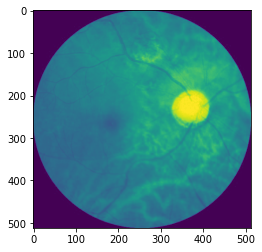

In [6]:
plt.imshow(images[500])

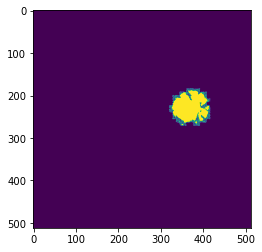

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

6392

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=6392, weights=weights)

Weights OK!


In [11]:
RUNS = 10

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 34s 4s/step - loss: 1.1578 - dice_coeff: 0.4315 - val_loss: 1.4240 - val_dice_coeff: 0.2698
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 0.9145 - dice_coeff: 0.5351 - val_loss: 1.4245 - val_dice_coeff: 0.2706
Epoch 3/100
5/5 [==============================] - 7s 2s/step - loss: 0.8311 - dice_coeff: 0.5712 - val_loss: 1.4253 - val_dice_coeff: 0.2710
Epoch 4/100
5/5 [==============================] - 7s 2s/step - loss: 0.8226 - dice_coeff: 0.5778 - val_loss: 1.4254 - val_dice_coeff: 0.2713
Epoch 5/100
5/5 [==============================] - 7s 2s/step - loss: 0.7739 - dice_coeff: 0.5984 - val_loss: 1.4236 - val_dice_coeff: 0.2718
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.7523 - dice_coeff: 0.6094 - val_loss: 1.4196 - val_dice_coeff: 0.2725
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.7338 - dice_coeff: 0.6169 - val_loss: 1.4141 - val_dice_coeff: 0

In [13]:
R.classifier_scores

[[1.3562122583389282, 0.2731875777244568],
 [1.3214200735092163, 0.2519196569919586],
 [1.3083834648132324, 0.24422797560691833],
 [1.1775847673416138, 0.3115287721157074],
 [1.2572381496429443, 0.2312919795513153],
 [1.150526762008667, 0.2870199978351593],
 [1.1060526371002197, 0.31437042355537415],
 [1.1695717573165894, 0.27678078413009644],
 [1.1461515426635742, 0.2919255495071411],
 [0.6335110664367676, 0.6175515055656433]]

In [14]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.4846571385860443, 0.942558765411377],
 [51.78030014038086, 0.647519588470459],
 [0.7296826243400574, 0.9268929362297058],
 [1.5392909049987793, 0.9112271666526794],
 [28.04985237121582, 0.6370757222175598],
 [28.466705322265625, 0.5900783538818359],
 [32.3308219909668, 0.6318537592887878],
 [125.55644989013672, 0.5117493271827698]]

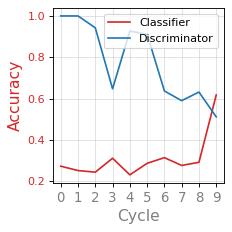

In [15]:
R.plot()

In [16]:
R.classifier_scores

[[1.3562122583389282, 0.2731875777244568],
 [1.3214200735092163, 0.2519196569919586],
 [1.3083834648132324, 0.24422797560691833],
 [1.1775847673416138, 0.3115287721157074],
 [1.2572381496429443, 0.2312919795513153],
 [1.150526762008667, 0.2870199978351593],
 [1.1060526371002197, 0.31437042355537415],
 [1.1695717573165894, 0.27678078413009644],
 [1.1461515426635742, 0.2919255495071411],
 [0.6335110664367676, 0.6175515055656433]]

In [17]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.4846571385860443, 0.942558765411377],
 [51.78030014038086, 0.647519588470459],
 [0.7296826243400574, 0.9268929362297058],
 [1.5392909049987793, 0.9112271666526794],
 [28.04985237121582, 0.6370757222175598],
 [28.466705322265625, 0.5900783538818359],
 [32.3308219909668, 0.6318537592887878],
 [125.55644989013672, 0.5117493271827698]]

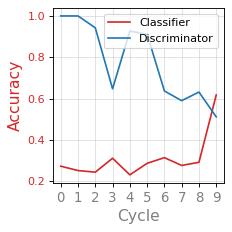

In [18]:
R.plot()